In [1]:
!pip install datasets


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
pip install Pillow


# Let's try now with the big file


In [47]:
import os
import tarfile
from huggingface_hub import hf_hub_download
from PIL import Image
from datasets import Dataset, Image as DatasetsImage

# -------------------------------
# Partie 1 : Télécharger et extraire le tar
# -------------------------------

repo_id = "Team198523/dataset_image"  # URL du repo
filename = "VisA_20220922.tar"
revision = "main"  # Branche utilisée

# Télécharger le fichier TAR (sans afficher le chemin téléchargé)
tar_path = hf_hub_download(
    repo_id=repo_id,
    filename=filename,
    repo_type="dataset",
    revision=revision
)

# Spécifier le dossier de destination pour l'extraction
extract_path = "VisA_20220922_extracted"
os.makedirs(extract_path, exist_ok=True)

# Décompresser l'archive TAR dans le dossier d'extraction
with tarfile.open(tar_path, "r:*") as tar:
    tar.extractall(path=extract_path)

# -------------------------------
# Partie 2 : Charger l'image et créer un dataset
# -------------------------------

# Construire le chemin complet vers l'image extraite
# Adaptation en fonction de la structure : ici, on suppose que l'archive contient un dossier "candle"
image_path = os.path.join(extract_path, "candle", "Data", "Images", "Anomaly", "078.JPG")

# Créer un dataset à partir de la liste de chemins d'images
dataset = Dataset.from_dict({"image": [image_path]})

# Utiliser cast_column() pour transformer la colonne "image" en objet PIL avec la feature Image()
dataset = dataset.cast_column("image", DatasetsImage())

# Charger et afficher la première image du dataset
image_from_dataset = dataset[0]["image"]
image_from_dataset.show()


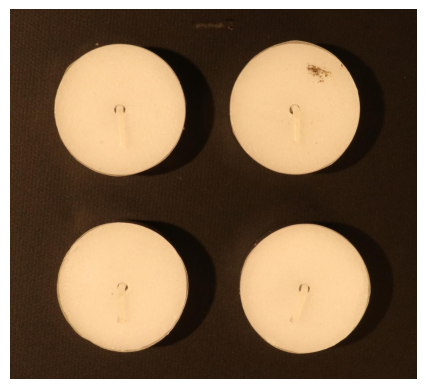

In [45]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/078.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/000.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


In [14]:
from transformers import EfficientFormerConfig, EfficientFormerModel


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [15]:
configuration = EfficientFormerConfig()

# Initializing a EfficientFormerModel (with random weights) from the efficientformer-l3 style configuration
model = EfficientFormerModel(configuration)

# Accessing the model configuration
configuration = model.config

In [17]:
pip install torch torchvision transformers datasets scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 952.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [18]:
import torch
from transformers import AutoImageProcessor, EfficientFormerModel
from torchvision import transforms
from PIL import Image
import os
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import roc_auc_score

# Chargement du modèle et du processeur d'images
model_name = "snap-research/efficientformer-l1-300"
image_processor = AutoImageProcessor.from_pretrained(model_name)
model = EfficientFormerModel.from_pretrained(model_name)

# Passage en mode évaluation (pas d'entraînement)
model.eval()

# Utilisation du GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


preprocessor_config.json:   0%|          | 0.00/422 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/63.7k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/49.4M [00:00<?, ?B/s]

EfficientFormerModel(
  (patch_embed): EfficientFormerConvStem(
    (convolution1): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batchnorm_before): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (convolution2): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batchnorm_after): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (encoder): EfficientFormerEncoder(
    (intermediate_stages): ModuleList(
      (0): EfficientFormerIntermediateStage(
        (meta4D_layers): EfficientFormerMeta4DLayers(
          (blocks): ModuleList(
            (0-2): 3 x EfficientFormerMeta4D(
              (token_mixer): EfficientFormerPooling(
                (pool): AvgPool2d(kernel_size=3, stride=1, padding=1)
              )
              (mlp): EfficientFormerConvMlp(
                (convolution1): Conv2d(48, 192, kernel_size=(1, 1), stride=(1, 1))
         

In [19]:
# Pipeline de transformation des images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensionner à la taille d'entrée du modèle
    transforms.ToTensor(),           # Convertir en tenseur PyTorch
    transforms.Normalize(
        mean=[0.4814, 0.4578, 0.4082],  # Moyenne de normalisation (ImageNet)
        std=[0.2686, 0.2613, 0.2758]    # Écart type de normalisation (ImageNet)
    )
])

# Fonction pour charger et prétraiter une image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Ajouter une dimension batch


In [25]:
import os
import numpy as np
import torch
from PIL import Image
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

# Chemin racine de vos données (à adapter)
extract_path = "VisA_20220922_extracted"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chargement du feature extractor et du modèle
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
model.to(device)
model.eval()

def load_and_preprocess_image(img_path):
    """
    Charge et prétraite une image en utilisant le feature extractor.
    """
    image = Image.open(img_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs["pixel_values"]

def extract_features(image_paths):
    """
    Extrait des caractéristiques pour chaque image de la liste image_paths.
    Ici, on utilise les logits du modèle comme représentation.
    """
    features = []
    with torch.no_grad():
        for img_path in image_paths:
            image_tensor = load_and_preprocess_image(img_path).to(device)
            outputs = model(pixel_values=image_tensor)
            # Dans ce cas, nous utilisons les logits comme vecteur de caractéristiques.
            feature_vector = outputs.logits.cpu().numpy()
            features.append(feature_vector)
    return np.vstack(features)

# Charger les images normales depuis le dossier "Normal"
normal_dir = os.path.join(extract_path, "candle", "Data", "Images", "Normal")

# Récupérer tous les fichiers images du dossier "Normal"
normal_image_paths = [
    os.path.join(normal_dir, filename)
    for filename in os.listdir(normal_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# Vérifier que des images ont bien été trouvées
if not normal_image_paths:
    raise FileNotFoundError(f"Aucune image trouvée dans le dossier {normal_dir}")

# Extraire les caractéristiques pour les images normales
normal_features = extract_features(normal_image_paths)

# Sauvegarder les caractéristiques extraites pour l'inférence
np.save("normal_features.npy", normal_features)
print("Caractéristiques normales sauvegardées dans 'normal_features.npy'")


/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


Caractéristiques normales sauvegardées dans 'normal_features.npy'


In [27]:
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Supposons que normal_features soit de forme (n_samples, n_features)
n_samples, n_features = normal_features.shape

# Choisissez un nombre de composantes inférieur à n_features
n_components = min(n_samples, n_features) - 1  # Par exemple
pca = PCA(n_components=n_components)
features_reduced = pca.fit_transform(normal_features)

# Entraînement du modèle avec les données réduites
anomaly_detector = EllipticEnvelope(contamination=0.01)
anomaly_detector.fit(features_reduced)


/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31334.791002945297805 > -31344.309497155023564). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31336.226848610596790 > -31342.233210275775491). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31336.226848610596790 > -31337.152839232810948). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn

EllipticEnvelope(contamination=0.01)

In [28]:
print(normal_features.shape)


(1000, 1000)


In [31]:
joblib.dump(anomaly_detector, "anomaly_detector.pkl")
print("Modèle de détection d’anomalies sauvegardé sous 'anomaly_detector.pkl'")

Modèle de détection d’anomalies sauvegardé sous 'anomaly_detector.pkl'


In [29]:
# Charger les images anormales depuis le dossier "Anomaly"
anomaly_dir = os.path.join(extract_path, "candle", "Data", "Images", "Anomaly")

# Récupérer tous les fichiers images du dossier "Anomaly"
anomaly_image_paths = [
    os.path.join(anomaly_dir, filename)
    for filename in os.listdir(anomaly_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# Vérifier qu’il y a bien des images d’anomalies
if not anomaly_image_paths:
    raise FileNotFoundError(f"Aucune image trouvée dans le dossier {anomaly_dir}")


In [35]:
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
import joblib

# Supposons que normal_features est déjà défini et de forme (n_samples, 1000)
# Entraînement
pca = PCA(n_components=999)
features_train_reduced = pca.fit_transform(normal_features)

anomaly_detector = EllipticEnvelope(contamination=0.01)
anomaly_detector.fit(features_train_reduced)

# Sauvegarder le détecteur et le PCA pour les réutiliser plus tard
joblib.dump(anomaly_detector, "anomaly_detector.pkl")
joblib.dump(pca, "pca_transformer.pkl")

# ... Plus tard, pour la prédiction ...

# Charger le détecteur et le PCA sauvegardés
anomaly_detector = joblib.load("anomaly_detector.pkl")
pca = joblib.load("pca_transformer.pkl")

# Extraire les caractéristiques des images à tester (de forme (n_samples_test, 1000))
test_features = extract_features(anomaly_image_paths)

# Appliquer la transformation PCA sur les données de test
test_features_reduced = pca.transform(test_features)

# Prédire les scores d'anomalie avec les données transformées (de dimension 999)
anomaly_scores = anomaly_detector.decision_function(test_features_reduced)


/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31329.481974956663180 > -31338.335574989130691). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31332.986048533544817 > -31335.827800717495847). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31334.554813263763208 > -31336.740103140291467). You may want to try with a higher value of support_fraction (current value: 1.000).
  warnings.warn

In [37]:
import numpy as np

# Définir un seuil basé sur le 5e percentile des scores normaux
threshold = np.percentile(anomaly_scores, 5)  # Seuil basé sur le 5e percentile

# Classifier chaque image : anomalie si le score < seuil
predictions = anomaly_scores < threshold

# Afficher les résultats
for img_path, score, pred in zip(anomaly_image_paths, anomaly_scores, predictions):
    status = "Anomalie" if pred else "Normale"
    print(f"{img_path}: {status} (score: {score:.2f})")


VisA_20220922_extracted/candle/Data/Images/Anomaly/032.JPG: Normale (score: -5515865.47)
VisA_20220922_extracted/candle/Data/Images/Anomaly/013.JPG: Normale (score: -15191960.48)
VisA_20220922_extracted/candle/Data/Images/Anomaly/086.JPG: Normale (score: -1512109.65)
VisA_20220922_extracted/candle/Data/Images/Anomaly/040.JPG: Normale (score: -330151.19)
VisA_20220922_extracted/candle/Data/Images/Anomaly/000.JPG: Normale (score: -1529485.24)
VisA_20220922_extracted/candle/Data/Images/Anomaly/042.JPG: Normale (score: -1770570.91)
VisA_20220922_extracted/candle/Data/Images/Anomaly/094.JPG: Normale (score: -1449843.29)
VisA_20220922_extracted/candle/Data/Images/Anomaly/060.JPG: Normale (score: -792068.42)
VisA_20220922_extracted/candle/Data/Images/Anomaly/085.JPG: Normale (score: -2455726.57)
VisA_20220922_extracted/candle/Data/Images/Anomaly/051.JPG: Normale (score: -902251.69)
VisA_20220922_extracted/candle/Data/Images/Anomaly/076.JPG: Normale (score: -3088250.51)
VisA_20220922_extracted

In [38]:
from sklearn.metrics import roc_auc_score

# Labels réels : 1 pour anomalie, 0 pour normal (à adapter selon ton dataset)
true_labels = [1] * len(anomaly_image_paths)  # Ici, toutes les images testées sont des anomalies

# Calcul du score AUROC
auc = roc_auc_score(true_labels, -anomaly_scores)  # On inverse car les scores négatifs indiquent des anomalies
print(f"AUROC Score: {auc:.4f}")


AUROC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


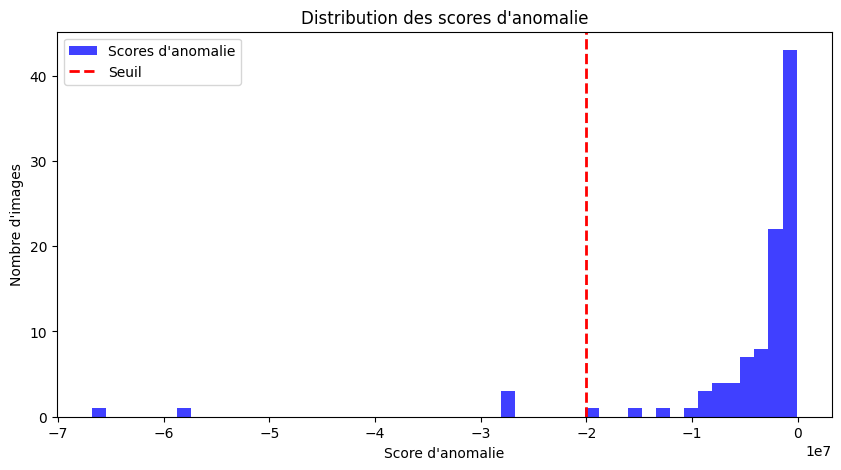

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(anomaly_scores, bins=50, alpha=0.75, color='blue', label="Scores d'anomalie")
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Seuil")
plt.xlabel("Score d'anomalie")
plt.ylabel("Nombre d'images")
plt.legend()
plt.title("Distribution des scores d'anomalie")
plt.show()


In [40]:
import pandas as pd

# Création d'un dataframe avec les résultats
results_df = pd.DataFrame({
    "image_path": anomaly_image_paths,
    "anomaly_score": anomaly_scores,
    "prediction": ["Anomalie" if pred else "Normale" for pred in predictions]
})

# Sauvegarde des résultats
results_df.to_csv("detection_results.csv", index=False)
print("Rapport des anomalies sauvegardé dans 'detection_results.csv'")


Rapport des anomalies sauvegardé dans 'detection_results.csv'
